1. Recap
2. Hyperparameter optimization
3. Expanding grid search
4. Visualizing hyperparameter values
5. Varying features and hyperparameters
6. Practice the workflow
7. Next steps

### 1: Recap

In the last mission, we focused on increasing the number of attributes the model uses. We saw how, in general, adding more attributes generally lowered the error of the model. This is because the model is able to do a better job identifying the living spaces from the training set that are the most similar to the ones from the test set. However, we also observed how using all of the available features didn't actually improve the model's accuracy automatically and that some of the features were probably not relevant for similarity ranking. We learned that <b>selecting relevant features</b> was the right lever when improving a model's accuracy, <b>not just increasing the features</b> used in the absolute.

In this mission, we'll focus on the impact of increasing k, the number of nearby neighbors the model uses to make predictions. We exported both the training (train_df) and test sets (test_df) from the last missions to CSV files, dc_airbnb_train.csv and dc_airbnb_test.csv respectively. Let's read both these CSV's into Dataframes.
Instructions

    Read dc_airbnb_train.csv into a Dataframe and assign to train_df.
    Read dc_airbnb_test.csv into a Dataframe and assign to test_df.


In [3]:
import pandas as pd

train_df = pd.read_csv('dc_airbnb_train.csv')
test_df  = pd.read_csv('dc_airbnb_test.csv')

### 2: Hyperparameter optimization

When we vary the features that are used in the model, we're affecting the data that the model uses. On the other hand, varying the k value affects the behavior of the model independently of the actual data that's used when making predictions. In other words, we're impacting how the model performs without trying to change the data that's used.

> Values that affect the behavior and performance of a model that are unrelated to the data that's used are referred to as <b>hyperparameters</b>. 
> <u>The process</u> of finding the optimal hyperparameter value is known as hyperparameter optimization. A simple but common hyperparameter optimization technique is known as grid search, which involves:

    * selecting a subset of the possible hyperparameter values,
    * training a model using each of these hyperparameter values,
    * evaluating each model's performance,
    * selecting the hyperparameter value that resulted in the lowest error value.

Grid search essentially boils down to evaluating the model performance at different k values and <u>selecting</u> the k value that resulted in the <u>lowest error</u>. While grid search can take a long time when working with large datasets, the data we're working with in this mission is small and this process is relatively quick.

Let's confirm that grid search will work quickly for the dataset we're working with by first observing how the model performance changes as we increase the k value from 1 to 5. If you recall, we set 5 as the k value for the last 2 missions. Let's use the features from the last mission that resulted in the best model accuracy:

    accommodates
    bedrooms
    bathrooms
    number_of_reviews

Instructions

    Create a list containing the integer values 1, 2, 3, 4, and 5, in that order, and assign to hyper_params.
    Create an empty list and assign to mse_values.
    Use a for loop to iterate over hyper_params and in each iteration:
        Instantiate a KNeighborsRegressor object with the following parameters:
            n_neighbors: the current value for the iterator variable,
            algorithm: brute
        Fit the instantiated k-nearest neighbors model to the following columns from train_df:
            accommodates
            bedrooms
            bathrooms
            number_of_reviews
        Use the trained model to make predictions on the same columns from test_df and assign to predictions.
        Use the mean_squared_error function to calculate the MSE value between predictions and the price column from test_df.
        Append the MSE value to mse_values.
    Display mse_values using the print() function.


In [41]:
#Create a list containing the integer values 1, 2, 3, 4, and 5, in that order, and assign to hyper_params
hyper_params = range(1,6) #[1,2,3,4,5]
hyper_params

range(1, 6)

In [42]:
#Create an empty list and assign to mse_values.
mse_values = []

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

#Use a for loop to iterate over hyper_params and in each iteration:
for i in hyper_params:
    #Instantiate a KNeighborsRegressor object with the following parameters:
    knn = KNeighborsRegressor(n_neighbors = i , algorithm='brute')
    
    features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
    #Fit the instantiated k-nearest neighbors model to the following columns from train_df:
    knn.fit(train_df[features], train_df['price'])
    #Use the trained model to make predictions on the same columns from test_df and assign to predictions
    predictions = knn.predict(test_df[features])
    
    #Use the mean_squared_error function to calculate the MSE value between predictions and the price column from test_df.
    y_true = test_df['price']
    y_pred = predictions    
    mse = mean_squared_error(y_true, y_pred)
    mse_values.append(mse)
    
print(mse_values)    
    

[26364.928327645051, 15100.522468714449, 14579.597901655923, 16212.300767918088, 14090.011649601822]


### 3: Expanding grid search

Since our dataset is small and scikit-learn has been developed with performance in mind, the code ran quickly. As we increased the k value from 1 to 5, the MSE value fell from approximately 26364 to approximately 14090:

    k 	MSE
    1 	26364.928327645051
    2 	15100.522468714449
    3 	14579.597901655923
    4 	16212.300767918088
    5 	14090.011649601822

Let's expand grid search all the way to a k value of 20. While 20 may seem like an arbitrary ending point for our grid search, we can always expand the values we try if we're unconvinced that the lowest MSE value is associated with one of the hyperparamter values we tried so far.
Instructions

    Change the list of hyperparameter values, hyper_params, so it ranges from 1 to 20.
    Create an empty list and assign to mse_values.
    Use a for loop to iterate over hyper_params and in each iteration:
        Instantiate a KNeighborsRegressor object with the following parameters:
            n_neighbors: the current value for the iterator variable,
            algorithm: brute
        Fit the instantiated k-nearest neighbors model to the following columns from train_df:
            accommodates
            bedrooms
            bathrooms
            number_of_reviews
        Use the trained model to make predictions on the same columns from test_df and assign to predictions.
        Use the mean_squared_error function to calculate the MSE value between predictions and the price column from test_df.
        Append the MSE value to mse_values.
    Display mse_values using the print() function.


In [36]:
#show results in form of a data frame:
print(pd.DataFrame(index=hyper_params,columns = ['mse_values'],data=mse_values))

     mse_values
1  26364.928328
2  15100.522469
3  14579.597902
4  16212.300768
5  14090.011650


In [46]:
#Create a list containing the integer values 1:20, in that order, and assign to hyper_params
hyper_params = range(1,21)

#Create an empty list and assign to mse_values.
mse_values = []

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

#Use a for loop to iterate over hyper_params and in each iteration:
for i in hyper_params:
    #Instantiate a KNeighborsRegressor object with the following parameters:
    knn = KNeighborsRegressor(n_neighbors = i , algorithm='brute')
    
    features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
    #Fit the instantiated k-nearest neighbors model to the following columns from train_df:
    knn.fit(train_df[features], train_df['price'])
    #Use the trained model to make predictions on the same columns from test_df and assign to predictions
    predictions = knn.predict(test_df[features])
    
    #Use the mean_squared_error function to calculate the MSE value between predictions and the price column from test_df.
    y_true = test_df['price']
    y_pred = predictions    
    mse = mean_squared_error(y_true, y_pred)
    mse_values.append(mse)
    
print(mse_values) 

[26364.928327645051, 15100.522468714449, 14579.597901655923, 16212.300767918088, 14090.011649601822, 13657.290671217292, 14288.273896589353, 14853.448183304892, 14670.831907751512, 14642.451478953355, 14734.071380889252, 14854.556669510808, 14733.16190399257, 14777.975894453346, 14771.124646694478, 14870.178509847838, 14832.598509630716, 14783.592968300116, 14775.594716988267, 14676.947986348125]


In [47]:
#show results in form of a data frame:
print(pd.DataFrame(index=hyper_params,columns = ['mse_values'],data=mse_values))

      mse_values
1   26364.928328
2   15100.522469
3   14579.597902
4   16212.300768
5   14090.011650
6   13657.290671
7   14288.273897
8   14853.448183
9   14670.831908
10  14642.451479
11  14734.071381
12  14854.556670
13  14733.161904
14  14777.975894
15  14771.124647
16  14870.178510
17  14832.598510
18  14783.592968
19  14775.594717
20  14676.947986


### 4: Visualizing hyperparameter values

As we increased the k value from 1 to 6, the MSE value decreased from approximately 26364 to approximately 13657. However, as we increased the k value from 7 to 20, the MSE value didn't decrease further but instead hovered between approximately 14288 and 14870. This means that the optimal k value is 6, since it resulted in the lowest MSE value.

This pattern is something you'll notice while performing grid search across other models as well. As you increase k at first, the error rate decreases until a certain point, but then rebounds and increases again. Let's confirm this behavior visually using a scatter plot.
Instructions

    Use the scatter() method from matplotlib.pyplot to generate a line plot with:
        hyper_params on the x-axis,
        mse_values on the y-axis.

    Use plt.show() to display the line plot.


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = [x for x in range(1, 21)]
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

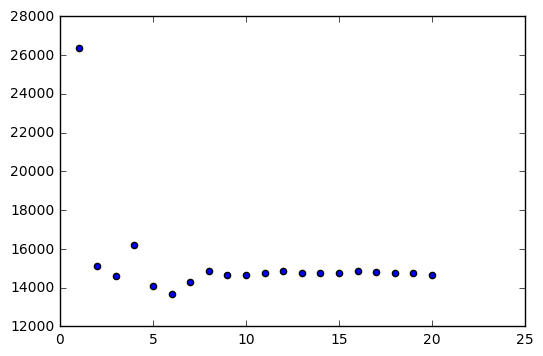

In [49]:
plt.scatter(hyper_params, mse_values)

### 5: Varying features and hyperparameters

From the scatter plot, you can tell that the lowest MSE value was achieved at the k value of 6. As we increased k past 6, the MSE actually increased and hovered but never decreased below 13657 (the approximate MSE value when k was 6).

Since varying the k value decreased the MSE value for this model, you may be wondering if repeating the grid search process for one of the models from the last mission that performed poorly when we fixed k to 5 would result in a lower MSE value. Let's try it out!
Instructions

    Use a for loop to iterate over hyper_params and in each iteration:
        Instantiate a KNeighborsRegressor object with the following parameters:
            n_neighbors: the current value for the iterator variable,
            algorithm: brute
        Fit the instantiated k-nearest neighbors model to all of the columns, except for the price column, from train_df
        Use the trained model to make predictions on the same columns from test_df and assign to predictions.
        Use the mean_squared_error function to calculate the MSE value between predictions and the price column from test_df.
        Append the MSE value to mse_values.
    Use the scatter() method from matplotlib.pyplot to generate a line plot with:
        hyper_params on the x-axis,
        mse_values on the y-axis.
    Use plt.show() to display the line plot.


These are the features: ['accommodates', 'bedrooms', 'bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews']


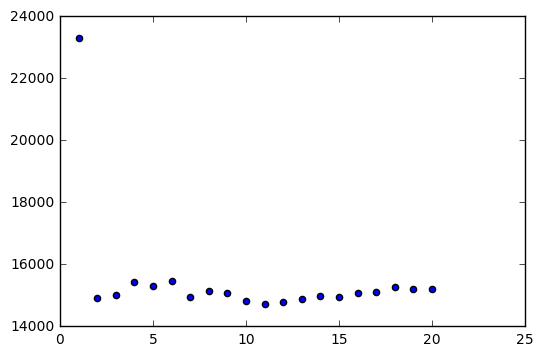

      mse_values
1   23303.759954
2   14917.940273
3   15006.177727
4   15449.652801
5   15291.714448
6   15477.233820
7   14962.337559
8   15127.307825
9   15088.437675
10  14827.991320
11  14711.463346
12  14804.073703
13  14877.339789
14  14972.467101
15  14961.879393
16  15071.084271
17  15096.083824
18  15256.588225
19  15216.990417
20  15211.609539


In [53]:
hyper_params = [x for x in range(1,21)]
mse_values = list()
features = train_df.columns.tolist()
features.remove('price')
print('These are the features:',features)

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

plt.scatter(hyper_params, mse_values)
plt.show()

#show results in form of a data frame:
print(pd.DataFrame(index=hyper_params,columns = ['mse_values'],data=mse_values))

### 6: Practice the workflow

You may have noticed that the general workflow for finding the best model is:

    select relevant features to use for predicting the target column.
    use grid search to find the optimal hyperparameter value for the selected features.
    evaluate the model's accuracy and repeat the process.

Let's now practice this workflow.
Instructions

    While using only the accommodates and bathrooms columns:
        Train a model for each k value between 1 and 20 using the training data.
        Use each model to make predictions on the test set (using just the accommodates and bathrooms columns).
        Calculate each model's MSE value by comparing each set of predictions to the true price values.
        Find the k value that obtained the lowest MSE value.
        Create a dictionary named two_hyp_mse that contains 1 key-value pair:
            key: k value that resulted in lowest MSE value.
            value: corresponding MSE value.

    Repeat this process while using only the accommodates, bathrooms, and bedrooms columns:
        Create a dictionary named three_hyp_mse that contains 1 key-value pair:
            key: k value that resulted in lowest MSE value.
            value: corresponding MSE value.

    Display both two_hyp_mse and three_hyp_mse using the print() function.


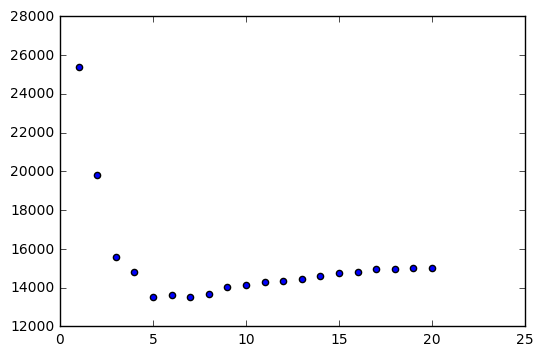

    two_mse_values
1     25408.530148
2     19812.082765
3     15602.043737
4     14815.615543
5     13522.893333
6     13638.665971
7     13532.605976
8     13687.011857
9     14027.993652
10    14134.482275
11    14275.733704
12    14364.687176
13    14474.450721
14    14608.642753
15    14766.315202
16    14830.735135
17    14942.220076
18    14966.923619
19    14991.287146
20    15006.305811


In [66]:
#While using only the accommodates and bathrooms columns:
import matplotlib.pyplot as plt
%matplotlib inline

features = ['accommodates', 'bathrooms']
hyper_params = [x for x in range(1, 21)]
two_mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)
    
plt.scatter(hyper_params, mse_values) 
plt.show()

#show results in form of a data frame:
print(pd.DataFrame(index=hyper_params,columns = ['two_mse_values'],data=mse_values))


In [68]:
two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

for k,mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k + 1
two_lowest_mse        

14790.314266211606

In [73]:
#Create a dictionary named two_hyp_mse that contains 1 key-value pair:
two_hyp_mse = dict()
two_hyp_mse[two_lowest_k] = two_lowest_mse
print(two_hyp_mse)

{5: 14790.314266211606}


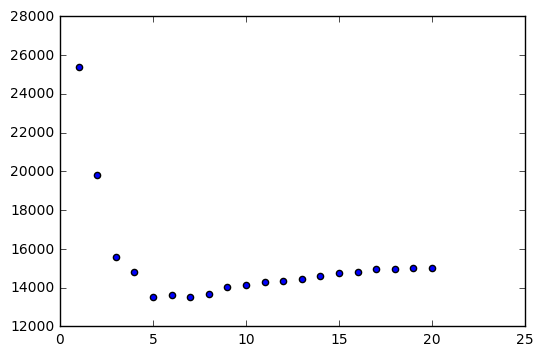

    three_mse_values
1       25408.530148
2       19812.082765
3       15602.043737
4       14815.615543
5       13522.893333
6       13638.665971
7       13532.605976
8       13687.011857
9       14027.993652
10      14134.482275
11      14275.733704
12      14364.687176
13      14474.450721
14      14608.642753
15      14766.315202
16      14830.735135
17      14942.220076
18      14966.923619
19      14991.287146
20      15006.305811


In [76]:
#While using only the accommodates, bathrooms, and bedrooms columns:
import matplotlib.pyplot as plt
%matplotlib inline

three_features = ['accommodates', 'bathrooms','bedrooms']
hyper_params = [x for x in range(1, 21)]
three_mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)
    
plt.scatter(hyper_params, mse_values) 
plt.show()

#show results in form of a data frame:
print(pd.DataFrame(index=hyper_params,columns = ['three_mse_values'],data=mse_values))


In [77]:
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1

for k,mse in enumerate(three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k + 1
        
three_lowest_mse        

13522.893333333333

In [78]:
#Create a dictionary named two_hyp_mse that contains 1 key-value pair:
three_hyp_mse = dict()
three_hyp_mse[three_lowest_k] = three_lowest_mse
print(three_hyp_mse)

{5: 13522.893333333333}


In [80]:
print(two_hyp_mse)
print(three_hyp_mse)

{5: 14790.314266211606}
{5: 13522.893333333333}


### 7: Next steps

The first model, which used the accommodates and bathrooms columns, was able to achieve an MSE value of approximately 14790. The second model, which added the bedrooms column, was ble to achieve an MSE value of approximately 13522.9, which is even lower than the lowest MSE value we achieved using the best model from the last mission (which used the accommodates, bedrooms, bathrooms, and number_of_reviews columns. Hopefully this demonstrates that using just one lever to find the best model isn't enough and you really want to use both levers in conjunction.

In this mission, we learned about hyperparameter optimization and the workflow of finding the optimal model to make predictions. Next in this course is a challenge, where you'll practice the concepts you've learned so far on a completely new dataset.